# 1変数線形回帰

1変数線形回帰の例として，新たに移動式屋台を展開した場合の利益を都市の人口から予測する問題を扱う．すでに展開した都市における人口と利益のデータを用い，人口から利益を予測する線形関数を決める．

## データのロード

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# 訓練データのロード
# 1列目：都市の人口/10,000（特徴量），2列目：利益/$10,000（ターゲット）
data = np.loadtxt('data/ex1data1.txt',delimiter=',')
X_unext = np.array(data[:,0:-1]) # 特徴量を各都市について縦に並べた列ベクトル
y = np.array(data[:,-1]).reshape(-1,1) # ターゲットを各都市について縦に並べた列ベクトル
m, n = X_unext.shape
print('訓練データの数（都市数）：m =',m)
print('特徴量の数（今回は人口のみ）：n =',n)

訓練データの数（都市数）：m = 97
特徴量の数（今回は人口のみ）：n = 1


訓練データをプロットする．

Text(0, 0.5, 'Profit in $10,000s')

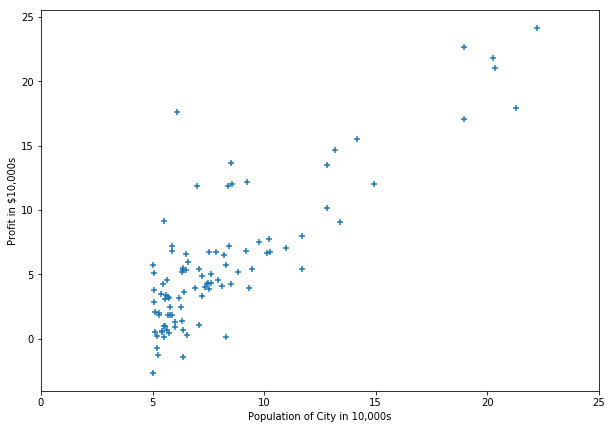

In [3]:
# 訓練データのプロット
plt.figure(figsize=(10,7))
plt.scatter(X_unext,y,marker='+')
plt.xlim([0,25])
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

## 仮設とコストの定義

各都市の特徴量（人口）を$x_1$，パラメータを$\theta =(\theta ^0 ,\theta ^1)^\mathrm{T}$とすると，利益の仮設は$h_\theta (x_1)=\theta ^0 +\theta ^1 x_1$と表される．ここで，0番目の特徴量として$x_0 =1$を導入し，$x=(x_0 ,x_1)^\mathrm{T}$を特徴量ベクトルとすると，仮設は$h_\theta (x)=x^\mathrm{T} \theta$のように内積の形で書ける．

都市の番号を上付き添字$(d)$ ($d=1,\dots ,m$) で表し，各都市の特徴量ベクトル$x^{(d)}$の転置を縦に並べた行列を
$$
X=
\begin{pmatrix}
(x^{(1)})^\mathrm{T} \\
\vdots\\
(x^{(m)})^\mathrm{T}
\end{pmatrix}
$$
とする．定義から$X$は$m\times (n+1)$行列であり，1列目の要素はすべて1である．

各都市の仮設$h_\theta (x^{(d)})$を縦に並べたベクトルは$X\theta$のように簡単に表せる．この仮設$X\theta$がターゲット$y=(y^{(1)} ,\dots ,y^{(m)})^\mathrm{T}$と近くなるようなパラメータ$\theta$を見つけたい．

In [4]:
# 新たな特徴量1を追加する関数
# X_unextは追加前のm*n行列，Xは追加後のm*(n+1)行列
def add1column(X_unext):
    X = np.hstack((np.ones((X_unext.shape[0],1)), X_unext))
    return(X)

In [5]:
X = add1column(X_unext)

コスト関数$J(\theta )$は，ターゲットに対する仮設の平均2乗誤差である：
$$
J(\theta )=\frac{1}{2m} \sum _{d=1}^m (h_\theta (x^{(d)})-y^{(d)})^2 =\frac{1}{2m} (X\theta -y)^2 .
$$
コスト$J(\theta )$が最小となるような最適パラメータ$\theta$を見つけることで，仮設とターゲットがなるべく近くなるようにすることができる．

In [6]:
# コスト関数
def computeCost(X,y,theta):
    m = y.size
    h = X.dot(theta)
    J = np.sum(np.square(h-y)) / (2*m)
    return(J)

In [7]:
# 初期パラメータでコスト関数を評価
thetai = np.zeros((n+1,1)) # 初期パラメータ（ゼロベクトル）
print(computeCost(X,y,thetai)) # コスト

32.072733877455676


コスト関数$J(\theta )$をプロットする．

In [8]:
# パラメータの格子点上でコスト関数を評価
theta0v = np.linspace(-10,10)
theta1v = np.linspace(0,2)
theta0g, theta1g = np.meshgrid(theta0v,theta1v)
Jg = np.zeros((theta1v.size,theta0v.size))
for i in np.arange(np.size(theta0v)):
    for j in np.arange(np.size(theta1v)):
        Jg[j,i] = computeCost(X,y,np.array([[theta0v[i]],[theta1v[j]]]))

Text(0, 0.5, '$\\theta _1$')

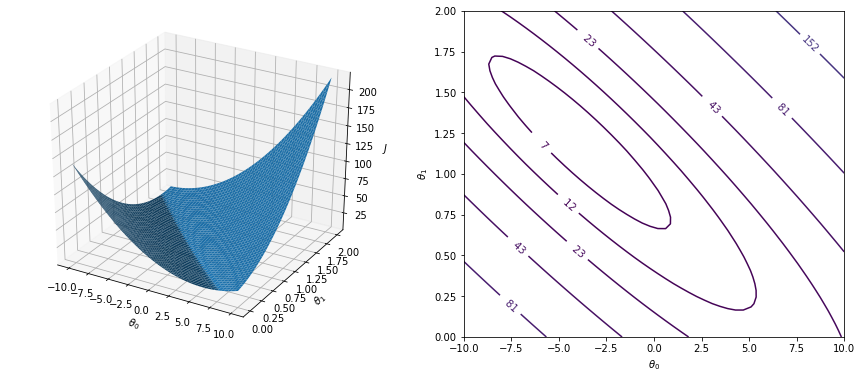

In [9]:
fig = plt.figure(figsize=(15,6))
# コストの表面プロット
ax1 = fig.add_subplot(121,projection='3d')
ax1.plot_surface(theta0g,theta1g,Jg)
ax1.set_xlabel(r'$\theta _0$')
ax1.set_ylabel(r'$\theta _1$')
ax1.set_zlabel(r'$J$')
# コストの等高線プロット
ax2 = fig.add_subplot(122)
cont = ax2.contour(theta0g,theta1g,Jg,levels=np.logspace(0,3,12))
cont.clabel(fmt='%3.0f')
ax2.set_xlim([-10,10])
ax2.set_ylim([0,2])
ax2.set_xlabel(r'$\theta _0$')
ax2.set_ylabel(r'$\theta _1$')

等高線プロットを見ると，真中の円の中に最適パラメータがあることがわかる．以下では最適パラメータの正確な値を求める．

## 勾配法

勾配法とは，コスト$J(\theta )$の勾配ベクトル$\partial J/\partial\theta$と反対方向にパラメータ$\theta$を動かすことで，コストが最小となるパラメータを見つける方法である．コストが最小となるとき勾配が消失する：$\partial J/\partial\theta =0$. パラメータ$\theta$の更新式は次のように表される：
$$
\theta\leftarrow\theta -\alpha\frac{\partial J(\theta )}{\partial\theta} =\theta -\alpha\frac{1}{m} X^\mathrm{T} (X\theta -y).
$$
ここで，$\alpha$は学習率である．学習率が小さすぎると最適パラメータにたどり着くのに時間がかかりすぎてしまう．逆に，学習率が大きすぎると更新に伴ってコストが下がらなかったり発散したりしてしまう．適切に学習率を選べていればコストは更新とともに下がっていくはずである．

In [10]:
# 勾配法
def gradientDescent(X,y,thetai,alpha=0.01,num_iters=2000):
    m = y.size
    theta = thetai
    theta_history = thetai * np.ones(num_iters)
    J_history = np.zeros(num_iters)
    
    for i in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha / m * (X.T.dot(h-y))
        theta_history[:,[i]] = theta
        J_history[i] = computeCost(X,y,theta)
    
    return(theta,theta_history,J_history)

In [11]:
# 勾配法の実行
theta_gd, theta_history, J_history = gradientDescent(X,y,thetai)

In [12]:
# 勾配法で得られた最適パラメータ
print('勾配法で得られた最適パラメータ theta =',theta_gd.flatten())

勾配法で得られた最適パラメータ theta = [-3.78806857  1.18221277]


勾配法の更新ごとにコストが減少し，コストとパラメータが収束することを確かめる．

Text(0, 0.5, '$\\theta _1$')

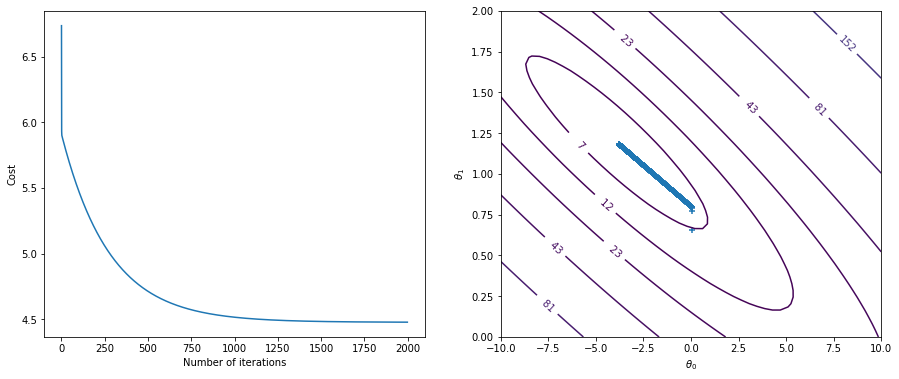

In [13]:
fig = plt.figure(figsize=(15,6))
# パラメータ更新ごとのコストをプロット
ax1 = fig.add_subplot(121)
ax1.plot(J_history)
ax1.set_xlabel('Number of iterations')
ax1.set_ylabel('Cost')
# 勾配法によるパラメータの動きをコストの等高線に重ねてプロット
ax2 = fig.add_subplot(122)
cont = ax2.contour(theta0g,theta1g,Jg,levels=np.logspace(0,3,12))
cont.clabel(fmt='%3.0f')
ax2.scatter(theta_history[0,:],theta_history[1,:],marker='+')
ax2.set_xlim([-10,10])
ax2.set_ylim([0,2])
ax2.set_xlabel(r'$\theta _0$')
ax2.set_ylabel(r'$\theta _1$')

## 正規方程式による求解，勾配法との比較

ここまでは勾配法を用いて最適パラメータを求めたが，線形回帰のコスト関数はパラメータの2次式なのでその勾配は1次式であり，勾配消失点は連立1次方程式の解として厳密に求まる．実際，勾配消失条件は
$$
0=\frac{\partial J(\theta )}{\partial\theta} =\frac{1}{m} X^\mathrm{T} (X\theta -y)\iff\theta =(X^\mathrm{T} X)^{-1} X^\mathrm{T} y
$$
のように書き換えられ，最適パラメータ$\theta$が求まることがわかる．

In [14]:
# 正規方程式の求解
def normalEq(X,y):
    theta = np.linalg.solve(X.T.dot(X), X.T.dot(y))
    return(theta)

In [15]:
# 正規方程式による最適パラメータの計算
theta_ne = normalEq(X,y)
print('正規方程式で得られた最適パラメータ theta =',theta_ne.flatten())

正規方程式で得られた最適パラメータ theta = [-3.89578088  1.19303364]


勾配法と正規方程式で求めた最適パラメータの差を求める．両者は大体近い値である．

In [16]:
print((theta_gd - theta_ne).flatten())

[ 0.10771231 -0.01082087]


勾配法の更新に伴うコストの動きとパラメータの動きを，正規方程式で得られたパラメータとコストの厳密な最適値と比較する．すると，勾配法によりコストとパラメータが最適値に収束していることがわかる．

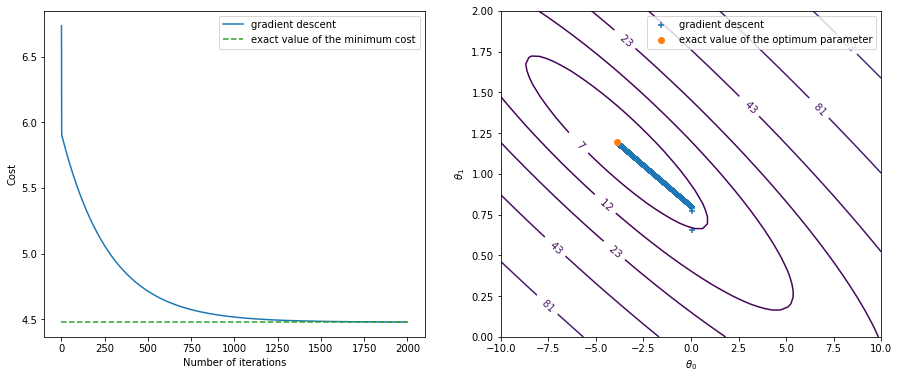

In [17]:
# 最小コストの厳密値
J_ne = computeCost(X,y,theta_ne)

fig = plt.figure(figsize=(15,6))
# 勾配法によるパラメータ更新ごとのコストをプロット
ax1 = fig.add_subplot(121)
ax1.plot(J_history,label='gradient descent')
ax1.plot(np.linspace(0,2000),J_ne*np.ones((50)),'--',color='#2ca02c',label='exact value of the minimum cost')
ax1.set_xlabel('Number of iterations')
ax1.set_ylabel('Cost')
ax1.legend()
# 勾配法によるパラメータの動きをコストの等高線に重ねてプロット
ax2 = fig.add_subplot(122)
cont = ax2.contour(theta0g,theta1g,Jg,levels=np.logspace(0,3,12))
cont.clabel(fmt='%3.0f')
ax2.scatter(theta_history[0,:],theta_history[1,:],marker='+',label='gradient descent')
ax2.scatter(theta_ne[0],theta_ne[1],label='exact value of the optimum parameter')
ax2.set_xlim([-10,10])
ax2.set_ylim([0,2])
ax2.set_xlabel(r'$\theta _0$')
ax2.set_ylabel(r'$\theta _1$')
ax2.legend()

## 仮設とデータの比較，予測

勾配法で得られたパラメータ$\theta$の正当性を確かめる．仮設$h_\theta (x)$が訓練データ$y$の近くを通る直線となっていることを見る．勾配法による仮設は正規方程式による仮設から少しずれる．

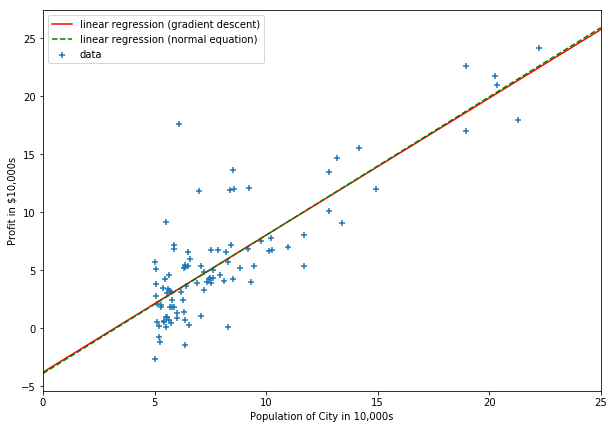

In [18]:
# 訓練データと勾配法，正規方程式による仮設をプロット
plt.figure(figsize=(10,7))
plt.scatter(X_unext,y,marker='+',label='data')
Xar_unext = np.arange(0,26).reshape(-1,1)
Xar = add1column(Xar_unext)
yar_gd = Xar.dot(theta_gd)
yar_ne = Xar.dot(theta_ne)
plt.plot(Xar_unext,yar_gd,'r-',label='linear regression (gradient descent)')
plt.plot(Xar_unext,yar_ne,'g--',label='linear regression (normal equation)')
plt.xlim([0,25])
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend()

予測の例として，人口が35,000人，70,000人の場合の利益を予測する．

In [19]:
# 利益の予測
print('人口35,000人の場合の利益/$ 勾配法：',10000*np.array([1,3.5]).dot(theta_gd),', 正規方程式：',10000*np.array([1,3.5]).dot(theta_ne))
print('人口70,000人の場合の利益/$ 勾配法：',10000*np.array([1,7]).dot(theta_gd),', 正規方程式：',10000*np.array([1,7]).dot(theta_ne))

人口35,000人の場合の利益/$ 勾配法： [3496.76138928] , 正規方程式： [2798.36876352]
人口70,000人の場合の利益/$ 勾配法： [44874.20850579] , 正規方程式： [44554.54631015]


## 学習率の調整

上記の勾配法の実装では学習率を$\alpha =0.01$としたが，この値を変えると勾配法の振る舞いがどのように変わるのかを観察する．

例えば$\alpha =0.02$としてみると，最終的にパラメータは最適値に収束するが，初め振動することがわかる．初めパラメータが振動するということは，学習率の値が今より少しでも大きくなるとコストが発散することを暗示している．

勾配法実行後のパラメータ theta = [-3.8928815   1.19274237]


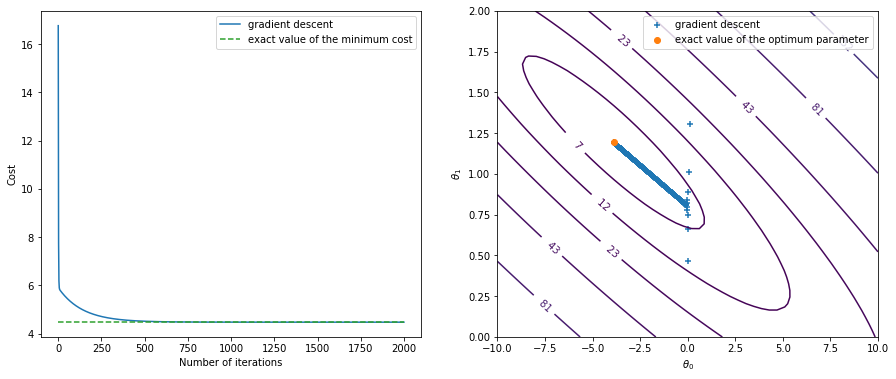

In [20]:
# 勾配法の実行
theta_gd, theta_history, J_history = gradientDescent(X,y,thetai,alpha=0.02)
print('勾配法実行後のパラメータ theta =',theta_gd.flatten())

# パラメータ更新ごとのコスト，パラメータの動きをプロット
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax1.plot(J_history,label='gradient descent')
ax1.plot(np.linspace(0,2000),J_ne*np.ones((50)),'--',color='#2ca02c',label='exact value of the minimum cost')
ax1.set_xlabel('Number of iterations')
ax1.set_ylabel('Cost')
ax1.legend()
ax2 = fig.add_subplot(122)
cont = ax2.contour(theta0g,theta1g,Jg,levels=np.logspace(0,3,12))
cont.clabel(fmt='%3.0f')
ax2.scatter(theta_history[0,:],theta_history[1,:],marker='+',label='gradient descent')
ax2.scatter(theta_ne[0],theta_ne[1],label='exact value of the optimum parameter')
ax2.set_xlim([-10,10])
ax2.set_ylim([0,2])
ax2.set_xlabel(r'$\theta _0$')
ax2.set_ylabel(r'$\theta _1$')
ax2.legend()

さらに大きな値$\alpha =0.03$にすると，パラメータ更新に伴ってコストが指数発散することがわかる．したがって，この学習率は大きすぎる．

Text(0, 0.5, '$\\theta _1$')

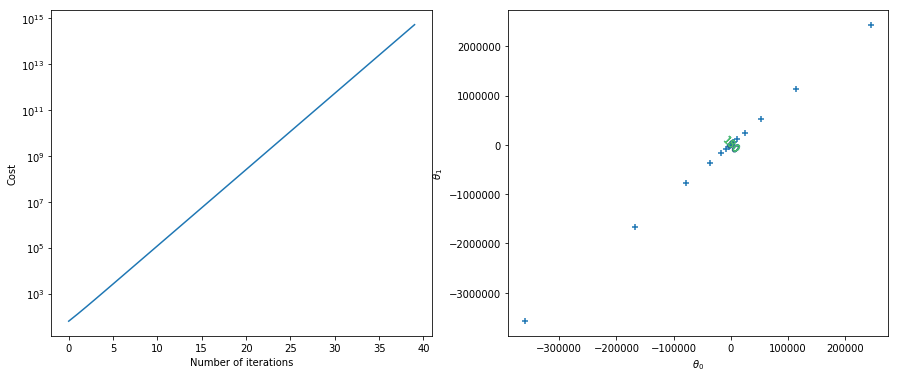

In [21]:
# 勾配法の実行
theta_gd, theta_history, J_history = gradientDescent(X,y,thetai,alpha=0.03,num_iters=40)

# パラメータ更新ごとのコスト，パラメータの動きをプロット
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax1.semilogy(J_history) # コストを片対数プロット
ax1.set_xlabel('Number of iterations')
ax1.set_ylabel('Cost')
ax2 = fig.add_subplot(122)
cont = ax2.contour(theta0g,theta1g,Jg)
cont.clabel(fmt='%3.0f')
ax2.scatter(theta_history[0,:],theta_history[1,:],marker='+')
ax2.set_xlabel(r'$\theta _0$')
ax2.set_ylabel(r'$\theta _1$')

では，学習率$\alpha$を逆に小さくするとどうなるだろうか．例えば$\alpha =0.003$としてみると，2,000ステップではコストとパラメータが最適値に収束しないことがわかる．

勾配法実行後のパラメータ theta = [-2.54821027  1.05765556]


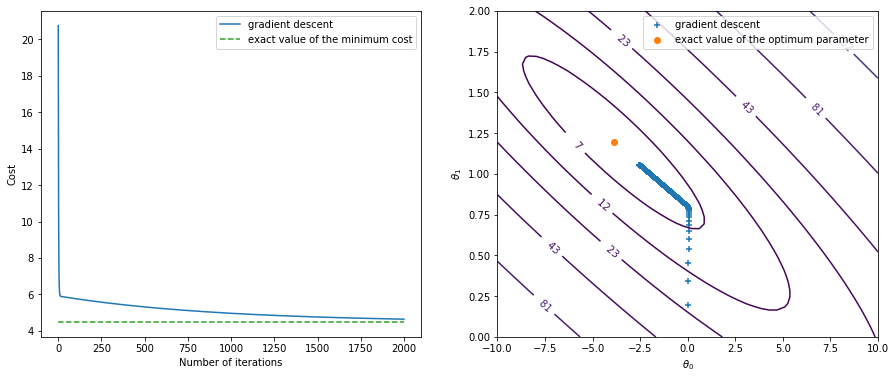

In [22]:
# 勾配法の実行
theta_gd, theta_history, J_history = gradientDescent(X,y,thetai,alpha=0.003)
print('勾配法実行後のパラメータ theta =',theta_gd.flatten())

# パラメータ更新ごとのコスト，パラメータの動きをプロット
fig = plt.figure(figsize=(15,6))
# パラメータ更新ごとのコストをプロット
ax1 = fig.add_subplot(121)
ax1.plot(J_history,label='gradient descent')
ax1.plot(np.linspace(0,2000),J_ne*np.ones((50)),'--',color='#2ca02c',label='exact value of the minimum cost')
ax1.set_xlabel('Number of iterations')
ax1.set_ylabel('Cost')
ax1.legend()
# 勾配法によるパラメータの動きをプロット
ax2 = fig.add_subplot(122)
cont = ax2.contour(theta0g,theta1g,Jg,levels=np.logspace(0,3,12))
cont.clabel(fmt='%3.0f')
ax2.scatter(theta_history[0,:],theta_history[1,:],marker='+',label='gradient descent')
ax2.scatter(theta_ne[0],theta_ne[1],label='exact value of the optimum parameter')
ax2.set_xlim([-10,10])
ax2.set_ylim([0,2])
ax2.set_xlabel(r'$\theta _0$')
ax2.set_ylabel(r'$\theta _1$')
ax2.legend()

$\alpha =0.003$の場合，7,000ステップ程度でパラメータが最適値に収束する．

勾配法実行後のパラメータ theta = [-3.80563461  1.18397747]


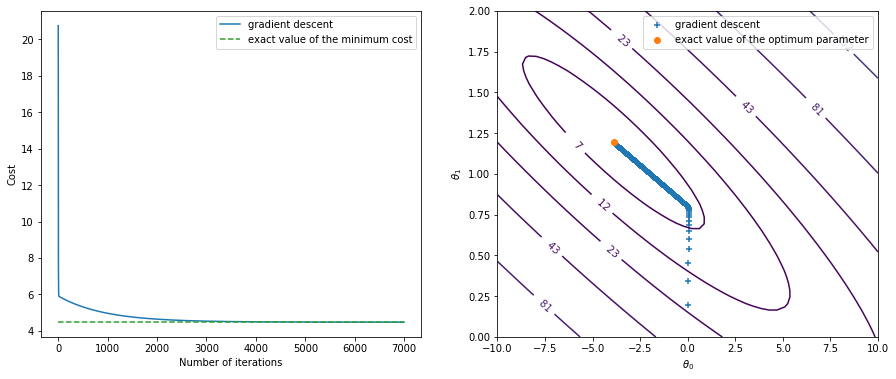

In [23]:
# 勾配法の実行
theta_gd, theta_history, J_history = gradientDescent(X,y,thetai,alpha=0.003,num_iters=7000)
print('勾配法実行後のパラメータ theta =',theta_gd.flatten())

# パラメータ更新ごとのコスト，パラメータの動きをプロット
fig = plt.figure(figsize=(15,6))
# パラメータ更新ごとのコストをプロット
ax1 = fig.add_subplot(121)
ax1.plot(J_history,label='gradient descent')
ax1.plot(np.linspace(0,7000),J_ne*np.ones((50)),'--',color='#2ca02c',label='exact value of the minimum cost')
ax1.set_xlabel('Number of iterations')
ax1.set_ylabel('Cost')
ax1.legend()
# 勾配法によるパラメータの動きをプロット
ax2 = fig.add_subplot(122)
cont = ax2.contour(theta0g,theta1g,Jg,levels=np.logspace(0,3,12))
cont.clabel(fmt='%3.0f')
ax2.scatter(theta_history[0,:],theta_history[1,:],marker='+',label='gradient descent')
ax2.scatter(theta_ne[0],theta_ne[1],label='exact value of the optimum parameter')
ax2.set_xlim([-10,10])
ax2.set_ylim([0,2])
ax2.set_xlabel(r'$\theta _0$')
ax2.set_ylabel(r'$\theta _1$')
ax2.legend()

以上の考察から，学習率$\alpha =0.01$はほぼ最適な値であったことがわかる．

## 特徴量のスケール調整と勾配法の問題点

このノートでは1変数線形回帰を扱っているが，多変数線形回帰では特徴量が複数個あるため，異なる特徴量が異なるスケールを持っていると，そのまま勾配法を用いても効率が悪かったり正しい最適パラメータに収束しなかったりする．例えば[家の面積と寝室数から価格を予測する問題](https://github.com/MCMXCIII-KVK/Coursera_Machine_Learning/blob/master/exercises_python/ex1_2.ipynb)では，面積 ($\mathrm{feet}^2$) が4桁なのに対し寝室数は1桁のため，特徴量のスケールが大きく異なる．そこで多変数線形回帰では，特徴量を規格化することが多い（規格化の方法として例えば，各特徴量から訓練データに関する平均値を引き標準偏差で割ったものを新たな特徴量とする方法がある）．

しかし，1変数線形回帰においても0番目の特徴量$x_0 =1$を導入しているため，訓練データから得られる特徴量$x_1$が大きすぎると勾配法の効率は悪くなると考えられる．実際に，1番目の特徴量を2倍したもの（すなわち5,000人単位の人口）を新たな特徴量として用いてみる．式で書くと，新たな特徴量は$x_1'=2x_1$である．0番目の特徴量はこれまでと同じく$x_0' =x_0 =1$とする．

In [24]:
# 1番目の特徴量を2倍し，0番目の特徴量を1とする
X = add1column(2*X_unext)

新たなコスト関数を
$$
J'(\theta ')=\frac{1}{2m} \sum _{d=1}^m (h_{\theta '} (x'^{(d)})-y^{(d)})^2
$$
と書くと，
$$
\theta '^0 =\theta ^0 ,\quad\theta '^1 =\frac{1}{2} \theta ^1
$$
のようにパラメータを変換することで
$$
J'(\theta ')=J(\theta )
$$
が成り立つ．したがって，最適パラメータ$\theta '$は特徴量のスケール変換前に求めた最適パラメータ$\theta$を用いて上式の変換により与えられる．

実際，正規方程式で最適パラメータを計算すると，新しい特徴量$x'$を用いたときの最適パラメータ$\theta '$は以前求めた最適パラメータ$\theta$と上記の変換で結ばれていることがわかる．

In [25]:
# 正規方程式による最適パラメータの計算
theta_ne = normalEq(X,y)
print('正規方程式で得られた最適パラメータ theta =',theta_ne.flatten())

正規方程式で得られた最適パラメータ theta = [-3.89578088  0.59651682]


では，勾配法を実行してみよう．まず学習率を$\alpha =0.01$とすると，勾配法は収束せずコストが指数発散する．

勾配法実行後のパラメータ theta = [-3.16333010e+12 -6.30809364e+13]


Text(0, 0.5, '$\\theta _1$')

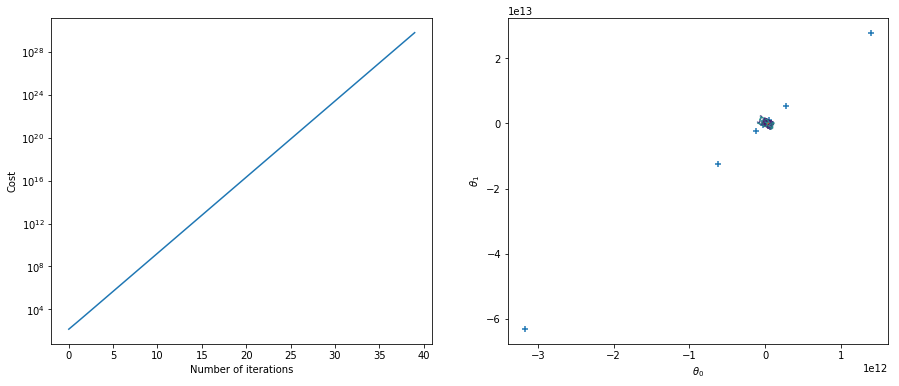

In [26]:
# 勾配法の実行
theta_gd, theta_history, J_history = gradientDescent(X,y,thetai,alpha=0.01,num_iters=40)
print('勾配法実行後のパラメータ theta =',theta_gd.flatten())

# パラメータの格子点上でコスト関数を評価
theta0v = np.linspace(-10,10)
theta1v = np.linspace(0,2)
theta0g, theta1g = np.meshgrid(theta0v,theta1v)
Jg = np.zeros((theta1v.size,theta0v.size))
for i in np.arange(np.size(theta0v)):
    for j in np.arange(np.size(theta1v)):
        Jg[j,i] = computeCost(X,y,np.array([[theta0v[i]],[theta1v[j]]]))

# パラメータ更新ごとのコスト，パラメータの動きをプロット
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax1.semilogy(J_history)
ax1.set_xlabel('Number of iterations')
ax1.set_ylabel('Cost')
ax2 = fig.add_subplot(122)
cont = ax2.contour(theta0g,theta1g,Jg,levels=np.logspace(0,3,12))
cont.clabel(fmt='%3.0f')
ax2.scatter(theta_history[0,:],theta_history[1,:],marker='+')
ax2.scatter(theta_ne[0],theta_ne[1])
ax2.set_xlabel(r'$\theta _0$')
ax2.set_ylabel(r'$\theta _1$')

そこで$\alpha =0.003$とすると，7,000ステップ程度で収束する．

勾配法実行後のパラメータ theta = [-3.80948666  0.59218941]


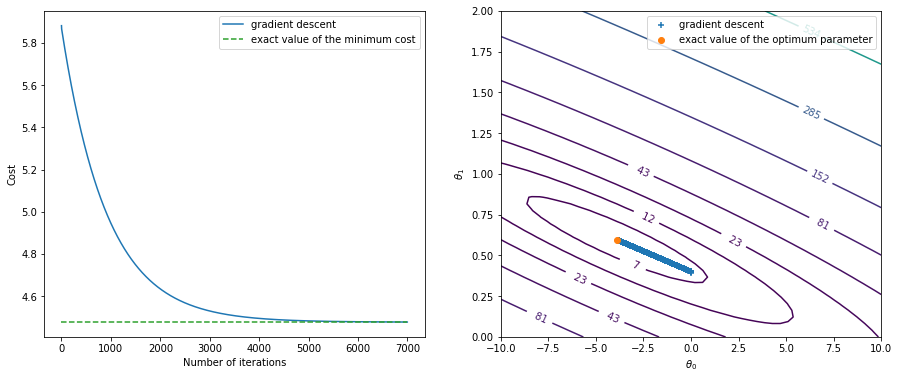

In [27]:
# 勾配法の実行
theta_gd, theta_history, J_history = gradientDescent(X,y,thetai,alpha=0.003,num_iters=7000)
print('勾配法実行後のパラメータ theta =',theta_gd.flatten())

# パラメータ更新ごとのコスト，パラメータの動きをプロット
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax1.plot(J_history,label='gradient descent')
ax1.plot(np.linspace(0,7000),J_ne*np.ones((50)),'--',color='#2ca02c',label='exact value of the minimum cost')
ax1.set_xlabel('Number of iterations')
ax1.set_ylabel('Cost')
ax1.legend()
ax2 = fig.add_subplot(122)
cont = ax2.contour(theta0g,theta1g,Jg,levels=np.logspace(0,3,12))
cont.clabel(fmt='%3.0f')
ax2.scatter(theta_history[0,:],theta_history[1,:],marker='+',label='gradient descent')
ax2.scatter(theta_ne[0],theta_ne[1],label='exact value of the optimum parameter')
ax2.set_xlim([-10,10])
ax2.set_ylim([0,2])
ax2.set_xlabel(r'$\theta _0$')
ax2.set_ylabel(r'$\theta _1$')
ax2.legend()

このように，1番目の特徴量を2倍しなかったときは$\alpha =0.01$, 2,000ステップ程度で収束したが，1番目の特徴量を2倍すると$\alpha =0.003$のように学習率を小さくし，更新回数も7,000程度と大きくしなければならない．この意味で，1番目の特徴量をより小さなスケールで見ると（10,000人単位で測っていたものを5,000人単位で測っているのでスケールは小さくなっている）勾配法の性能は悪くなると言える．

これはなぜだろうか．特徴量とパラメータの線形変換を想定して，勾配法の性能が悪くなった原因を考察しよう（以下の議論は一般の$n$変数線形回帰について成り立つ）．特徴量を$x'^\mathrm{T} =x^\mathrm{T} A^{-1}$ ($A$は$n+1$次正則行列) のように線形変換したとする（なお，特徴量$x$, $x'$は本来それぞれ事前分布$p$, $p'$に従う確率変数なので，より正確には事前分布が$q'(x')=(\det A)q(x)$のように変換する（$p'(x')\, d^{n+1} x'=p(x)\, d^{n+1} x$が成り立たねばならない））．パラメータを$\theta '=A\theta$のように変換すると，コスト関数は
$$
J'(\theta ')=\mathrm{E}_{p'(x',y)} \left[\frac{1}{2} (h_{\theta '} (x')-y)^2 \right] =\mathrm{E}_{p(x,y)} \left[\frac{1}{2} (h_\theta (x)-y)^2 \right] =J(\theta )
$$
のように不変になる．ただし$\mathrm{E}_{p(x,y)} [\cdot ]$は分布$p(x,y)$に関する期待値であり，$p(x,y)=p(x)p(y\vert x)$は特徴量とターゲットの組$(x,y)$の真の分布である（同様に$p'(x',y)=p'(x')p'(y\vert x')$は新しい特徴量とターゲットの組$(x',y)$の真の分布である）．真の分布はわからないので，コスト関数を訓練データに関する平均で近似する：
$$
J'(\theta ')=\frac{1}{2m} \sum _{d=1}^m (h_{\theta '} (x'^{(d)})-y^{(d)})^2 =\frac{1}{2m} \sum _{d=1}^m (h_\theta (x^{(d)})-y^{(d)})^2 =J(\theta ).
$$

このときの勾配の変換則を求める．行列$A$の$(i,j)$成分を${A^i}_j$のように書き，Einsteinの縮約規則（2回繰り返された添字について和をとる）を用いると，パラメータの変換則は$\theta '^i = {A^i}_j \theta ^j$となる．これを逆変換にすると$\theta ^j = {(A^{-1})^j}_i \theta '^i$となるので，
$$
\partial _i' =\frac{\partial\theta ^j}{\partial\theta '^i} \frac{\partial}{\partial\theta ^j} = {(A^{-1})^j}_i \partial _j
$$
が得られる（$\partial _i =\partial /\partial\theta _i$, $\partial _i' =\partial /\partial\theta _i'$とおいた）．よって，勾配の変換則は
$$
\frac{\partial J'(\theta ')}{\partial\theta '^i} =\frac{\partial J(\theta )}{\partial\theta ^j} {(A^{-1})^j}_i
$$
となる．あるいはベクトル表記をすると
$$
\left(\frac{\partial J'(\theta ')}{\partial\theta '} \right) ^\mathrm{T} =\left(\frac{\partial J(\theta )}{\partial\theta} \right) ^\mathrm{T} A^{-1} .
$$
となる．

以上で導いてきた種々の変換則は，統計多様体（パラメータが成す$n+1$次元空間）上でパラメータの座標が線形変換したときに伴うものである．パラメータの線形な座標変換$\theta '=A\theta$に対してパラメータから実数への写像$f$が
$$
f'(\theta ')=f(\theta )
$$
のように変換するとき，$f$は線形変換に対してスカラー場（関数）であると言われる．これは座標変換してもスカラー場の値は変わらないことを表している．定義からコスト関数はパラメータの線形変換に対してスカラー場である．また，パラメータから実数への$n+1$個の写像$v^i$が
$$
v'^i (\theta ')= {A^i}_j v^j (\theta )
$$
のように変換するとき$v^i$は線形変換に対して反変ベクトル場（接ベクトル場，ベクトル場）の成分であると言われ，写像$w_i$が
$$
w_i' (\theta ')=w_j (\theta ) {(A^{-1})^j}_i
$$
のように変換するとき$w_i$は線形変換に対して共変ベクトル場（余接ベクトル場）の成分であると言われる（なお，反変ベクトルの成分の添字は上付きで，共変ベクトルの成分の添字は下付きで書くのが慣例である）．これらの定義は，多様体の接空間の元である反変ベクトルおよび余接空間の元である共変ベクトルそのものが座標のとり方によらないことを要請している．式で書くと，
$$
v'^i \partial _i'=v^i \partial _i ,\quad w_i' d\theta '^i=w_i d\theta ^i
$$
となる（接空間の自然基底は偏微分作用素$\partial _i$，余接空間の自然基底は微分$d\theta ^i$であり，それらの基底変換則は$\partial _i' = {(A^{-1})^j}_i \partial _j$, $d\theta '^i = {A^i}_j d\theta ^j$であることに注意）．

上記の定義から，パラメータの線形な座標変換に対して，パラメータ自身は反変ベクトル場，勾配は共変ベクトル場である．このことが勾配法の本質的な問題点をついている．勾配法では更新毎のパラメータ変位として勾配に比例する量を採用しているが，パラメータの座標変換に対してパラメータ変位が異なる変換をすることは不自然である．1番目の特徴量を2倍した例では，変換行列は
$$
A=
\begin{pmatrix}
1 & 0 \\
0 & 1/2
\end{pmatrix}
$$
なので，パラメータの変換式が
$$
\theta '^0 =\theta ^0 ,\quad\theta '^1 =\frac{1}{2} \theta ^1
$$
であるのに対し勾配の変換式は
$$
\frac{\partial J'(\theta ')}{\partial\theta '^0} =\frac{\partial J(\theta )}{\partial\theta ^0} ,\quad\frac{\partial J'(\theta ')}{\partial\theta '^1} =2\frac{\partial J(\theta )}{\partial\theta ^1}
$$
である．すなわち，パラメータの第1成分は1/2倍されるにもかかわらず勾配法での変位の第1成分は2倍されてしまう．実際に$\alpha =0.003$の計算結果を見ると，コストの等高線は縦軸方向に2倍縮小されているのに対し，1回目の更新での変位は特徴量のスケール変換の前後で約0.2から約0.4に変わっていることがわかる（初期値$\theta =0$はプロットされていないことに注意）．つまり，パラメータ平面が縦軸方向に縮小されたにもかかわらず勾配法での縦方向の変位は拡大されてしまうのである．このことが，特徴量のスケール変換によって勾配法の性能が悪くなった原因である．仮に1番目の特徴量として1人単位の人口を用いた場合，勾配法は性能が著しく悪くなるか正しい結果を出さなくなることは想像に難くない．

## 自然勾配法

上記の勾配法の問題点を情報幾何学の観点で解決したのが自然勾配法である [Amari (2016)]．ここでは$n$変数線形回帰について自然勾配法の導入を行う．自然勾配法では，更新毎のパラメータ変位が反変ベクトルになるようにする．共変ベクトルと反変ベクトルを行き来するのは，計量と呼ばれる行列かその逆行列をかけることでなされる．

そこで，まず計量の導入を行う．計量は統計多様体上での距離を定める．

特徴量$x$とターゲット$y$が結合分布
$$
p(x,y\vert\theta )=p(x)p(y\vert x,\theta )=\frac{1}{\sqrt{2\pi\sigma ^2}} p(x)\exp\left( -\frac{1}{2\sigma ^2} (y-h_\theta (x))^2 \right)
$$
に従うとしよう．分散$\sigma ^2$はここでは推定しないので，定数とする（あるいは$\sigma\to 0$の極限をとって決定論的な予測を考える）．このとき，微小に離れた2つの分布$p(x,y\vert\theta )$, $p(x,y\vert\theta +d\theta )$の間の擬距離としてKullback-Leipler (KL) ダイバージェンスを考える：
$$
D[p(x,y\vert\theta )\Vert p(x,y\vert\theta +d\theta )]=\int d^{n+1} x\, dy\, p(x,y\vert\theta )\log\frac{p(x,y\vert\theta )}{p(x,y\vert\theta +d\theta )} .
$$
KLダイバージェンスを$d\theta$の2次まで展開すると，次式が得られる（ここでもEinsteinの縮約規則を用いる）：
$$
D[p(x,y\vert\theta )\Vert p(x,y\vert\theta +d\theta )]=\frac{1}{2} g_{ij} (\theta )\, d\theta ^i d\theta ^j +\mathcal{O} (\lvert d\theta\rvert ^3).
$$
ただし，$g_{ij} (\theta )$はFisher情報行列の成分と呼ばれ，次のように定義される：
$$
g_{ij} (\theta )=\mathrm{E}_{p(x,y\vert\theta )} [\partial _i \log p(x,y\vert\theta )\,\partial _j \log p(x,y\vert\theta )].
$$
Fisher情報行列$g=(g_{ij})$は計量として用いることができる．すなわち，Fisher情報行列は統計多様体上の微小に離れた2点間の距離を定める．

線形回帰では$h_\theta (x)=\theta ^i x_i$なので，Fisher情報行列の成分は
$$
g_{ij} (\theta )=\frac{1}{\sigma ^2} \mathrm{E}_{p(x,y\vert\theta )} [x_i x_j]=\frac{1}{\sigma ^2} \mathrm{E}_{p(x)} [x_i x_j]
$$
となる．ここで統計多様体上の線形変換$\theta ^i = {A^i}_j \theta ^j$, $x_i'=x_j {(A^{-1})^j}_i$を行うと，Fisher情報行列は
$$
g_{ij}'(\theta ')=\frac{1}{\sigma ^2} \mathrm{E}_{p'(x')} [x_i' x_j']=\frac{1}{\sigma ^2} \mathrm{E}_{p(x)} [x_k {(A^{-1})^k}_i x_l {(A^{-1})^l}_j]= {(A^{-1})^k}_i {(A^{-1})^l}_j g_{kl} (\theta )
$$
と変換する．このように$T_{ij}'(\theta ')= {(A^{-1})^k}_i {(A^{-1})^l}_j T_{kl} (\theta )$と変換する$T_{ij}$は，線形変換に対して2階共変テンソル場の成分であると言われる（余接空間のテンソル積空間の元$T_{ij} (\theta )\, d\theta ^i \otimes d\theta ^j$が座標のとり方によらなくなる）．また，Fisher情報行列の逆行列の成分を$g^{ij} :=(g^{-1})_{ij}$と書くと，これは線形変換に対して
$$
g'^{ij} (\theta ')= {A^i}_k {A^j}_l g^{kl} (\theta )
$$
と変換する．このように$T'^{ij} (\theta ')= {A^i}_k {A^j}_l T^{kl} (\theta )$と変換する$T^{ij}$は，線形変換に対して2階反変テンソル場の成分であると言われる（接空間のテンソル積空間の元$T^{ij} (\theta )\partial _i \otimes\partial _j$が座標のとり方によらなくなる）．

重要なのは，反変ベクトルの成分$v^i$にFisher情報行列の成分$g_{ij}$をかけて和をとったもの$v^i g_{ij}$は共変ベクトルの第$j$成分になり，共変ベクトルの成分$w_i$にFisher情報行列の逆行列の成分$g^{ij}$をかけて和をとったもの$w_i g^{ij}$は反変ベクトルの第$j$成分になるということである．つまり，計量かその逆行列をかけることで反変ベクトルと共変ベクトルを行き来することができる（これを「添字を上げ下げする」と言うことが多い）．

この性質を勾配法の改善に用いてみる．勾配法で用いたパラメータ変位は勾配$\partial J/\partial\theta ^i$に比例していたので共変ベクトルである．ここにFisher情報行列の逆行列をかけて反変ベクトル$g^{ij} \partial J/\partial\theta ^j$に置き換える．すると，新しい更新式は
$$
\theta\leftarrow\theta -\alpha g^{-1} (\theta )\frac{\partial J(\theta )}{\partial\theta}
$$
となる．このように，勾配に計量の逆行列をかけたもの（自然勾配と呼ばれる）をパラメータ変位として用いる方法を自然勾配法 [Amari (2016)] という（なお，自然勾配法は線形回帰に限ったものではない）．

Fisher情報行列は特徴量の事前分布$p(x)$に関する平均で与えられているが，分布$p(x)$はわからないので，データに関する平均値で近似しよう：
$$
g_{ij} (\theta )=\frac{1}{\sigma ^2 m} \sum _{d=1}^m x_i^{(d)} x_j^{(d)} .
$$
特徴量ベクトル$x^{(d)}$を縦に並べた行列$X$を用いると，
$$
g(\theta )=\frac{1}{\sigma ^2 m} X^\mathrm{T} X
$$
となる．すると，自然勾配は
$$
g^{-1} (\theta )\frac{\partial J(\theta )}{\partial\theta} =\sigma ^2 m(X^\mathrm{T} X)^{-1} \frac{1}{m} X^\mathrm{T} (X\theta -y)=\sigma ^2 (\theta -\theta ^*)
$$
となる．ただし，$\theta ^* =(X^\mathrm{T} X)^{-1} X^\mathrm{T} y$は正規方程式の解であり，コスト関数を最小にするパラメータの厳密な値である．よって，$\alpha\sigma ^2$を$\alpha$とおき直すと，自然勾配法の更新式は
$$
\theta\leftarrow\theta -\alpha (\theta -\theta ^*)=(1-\alpha )\theta +\alpha\theta ^*
$$
となる．上式の右辺は適当なパラメータ$\theta$と正規方程式の解$\theta ^*$の内分点に他ならない．したがって，この更新式は任意のパラメータ初期値から「一直線に」コスト関数の最小点に向かうことを表している．

なお，分布$p(x,y\vert\theta )$は指数型分布族に属しており，$\theta$はe接続に対するアフィン座標系となっているので，線形回帰の場合自然勾配法でパラメータ初期値からコスト関数の最小点に向かう直線は統計多様体上の測地線にもなっている [Amari (2016)]．

では自然勾配法を実行してみよう．特徴量は元のスケールに戻しておく．

In [28]:
# 自然勾配法
def naturalGradientDescent(X,y,thetai,alpha=0.01,num_iters=2000):
    theta = thetai
    theta_history = thetai * np.ones(num_iters)
    J_history = np.zeros(num_iters)
    theta_ne = normalEq(X,y)
    
    for i in np.arange(num_iters):
        theta = (1 - alpha) * theta + alpha * theta_ne
        theta_history[:,[i]] = theta
        J_history[i] = computeCost(X,y,theta)
    
    return(theta,theta_history,J_history)

In [29]:
# 特徴量行列
X = add1column(X_unext)

比較のため，学習率$\alpha =0.01$，更新回数2,000で勾配法と自然勾配法を両方実行する．すると，勾配法は収束に2,000ステップ程度かかっていたのに対し自然勾配法は500ステップ程度で収束していることがわかる．また，勾配法によるパラメータの動きは曲線的だが，自然勾配法では直線になっている．

勾配法実行後のパラメータ theta = [-3.78806857  1.18221277]
自然勾配法実行後のパラメータ theta = [-3.89578087  1.19303364]


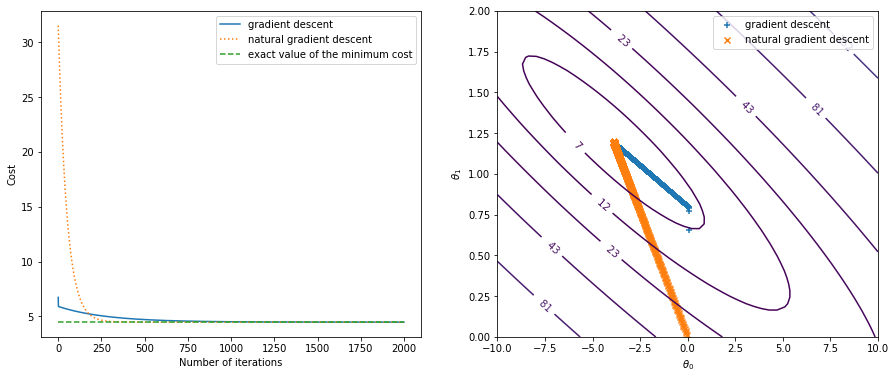

In [30]:
# 勾配法の実行
theta_gd, theta_history, J_history = gradientDescent(X,y,thetai)
print('勾配法実行後のパラメータ theta =',theta_gd.flatten())
# 自然勾配法の実行
theta_ngd, theta_nhistory, J_nhistory = naturalGradientDescent(X,y,thetai)
print('自然勾配法実行後のパラメータ theta =',theta_ngd.flatten())

# パラメータの格子点上でコスト関数を評価
theta0v = np.linspace(-10,10)
theta1v = np.linspace(0,2)
theta0g, theta1g = np.meshgrid(theta0v,theta1v)
Jg = np.zeros((theta1v.size,theta0v.size))
for i in np.arange(np.size(theta0v)):
    for j in np.arange(np.size(theta1v)):
        Jg[j,i] = computeCost(X,y,np.array([[theta0v[i]],[theta1v[j]]]))

# パラメータ更新ごとのコスト，パラメータの動きをプロット
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax1.plot(J_history,label='gradient descent')
ax1.plot(J_nhistory,':',label='natural gradient descent')
ax1.plot(np.linspace(0,2000),J_ne*np.ones((50)),'--',color='#2ca02c',label='exact value of the minimum cost')
ax1.set_xlabel('Number of iterations')
ax1.set_ylabel('Cost')
ax1.legend()
ax2 = fig.add_subplot(122)
cont = ax2.contour(theta0g,theta1g,Jg,levels=np.logspace(0,3,12))
cont.clabel(fmt='%3.0f')
ax2.scatter(theta_history[0,:],theta_history[1,:],marker='+',label='gradient descent')
ax2.scatter(theta_nhistory[0,:],theta_nhistory[1,:],marker='x',label='natural gradient descent')
ax2.set_xlim([-10,10])
ax2.set_ylim([0,2])
ax2.set_xlabel(r'$\theta _0$')
ax2.set_ylabel(r'$\theta _1$')
ax2.legend()

学習率$\alpha =0.003$でも実験してみる．

勾配法実行後のパラメータ theta = [-3.80563461  1.18397747]
自然勾配法実行後のパラメータ theta = [-3.89578088  1.19303364]


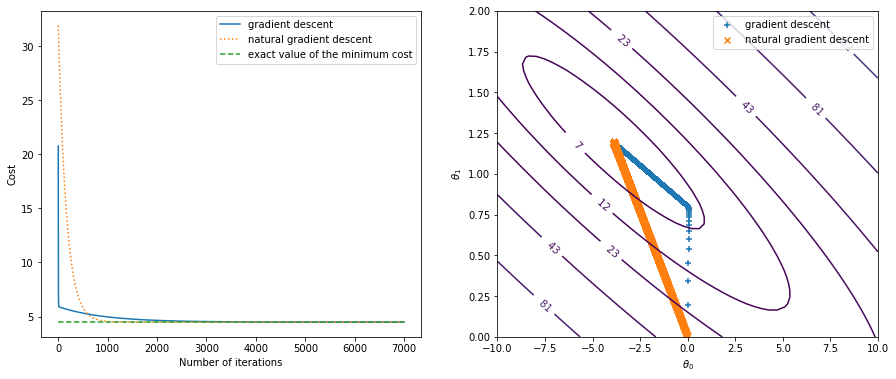

In [31]:
# 勾配法の実行
theta_gd, theta_history, J_history = gradientDescent(X,y,thetai,alpha=0.003,num_iters=7000)
print('勾配法実行後のパラメータ theta =',theta_gd.flatten())
# 自然勾配法の実行
theta_ngd, theta_nhistory, J_nhistory = naturalGradientDescent(X,y,thetai,alpha=0.003,num_iters=7000)
print('自然勾配法実行後のパラメータ theta =',theta_ngd.flatten())

# パラメータ更新ごとのコスト，パラメータの動きをプロット
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax1.plot(J_history,label='gradient descent')
ax1.plot(J_nhistory,':',label='natural gradient descent')
ax1.plot(np.linspace(0,7000),J_ne*np.ones((50)),'--',color='#2ca02c',label='exact value of the minimum cost')
ax1.set_xlabel('Number of iterations')
ax1.set_ylabel('Cost')
ax1.legend()
ax2 = fig.add_subplot(122)
cont = ax2.contour(theta0g,theta1g,Jg,levels=np.logspace(0,3,12))
cont.clabel(fmt='%3.0f')
ax2.scatter(theta_history[0,:],theta_history[1,:],marker='+',label='gradient descent')
ax2.scatter(theta_nhistory[0,:],theta_nhistory[1,:],marker='x',label='natural gradient descent')
ax2.set_xlim([-10,10])
ax2.set_ylim([0,2])
ax2.set_xlabel(r'$\theta _0$')
ax2.set_ylabel(r'$\theta _1$')
ax2.legend()

自然勾配法は特徴量のスケールを変えてもそのまま用いることができる．というのも，自然勾配法のパラメータ変位はパラメータのスケール変換と全く同じ変換をするので，スケール変換により性能が悪くなることはないのである．実際に1人単位の人口を特徴量として自然勾配法を実行してみる．

In [32]:
# 特徴量行列
X = add1column(10000*X_unext)

自然勾配法実行後のパラメータ theta = [-3.87018372e+00  1.18519484e-04]


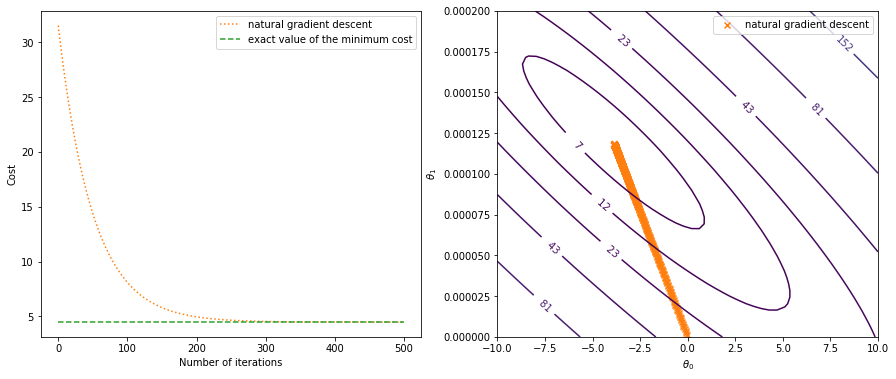

In [33]:
# 自然勾配法の実行
theta_ngd, theta_nhistory, J_nhistory = naturalGradientDescent(X,y,thetai,num_iters=500)
print('自然勾配法実行後のパラメータ theta =',theta_ngd.flatten())

# パラメータの格子点上でコスト関数を評価
theta0v = np.linspace(-10,10)
theta1v = np.linspace(0,0.0002)
theta0g, theta1g = np.meshgrid(theta0v,theta1v)
Jg = np.zeros((theta1v.size,theta0v.size))
for i in np.arange(np.size(theta0v)):
    for j in np.arange(np.size(theta1v)):
        Jg[j,i] = computeCost(X,y,np.array([[theta0v[i]],[theta1v[j]]]))

# パラメータ更新ごとのコスト，パラメータの動きをプロット
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax1.plot(J_nhistory,':',color='#ff7f0e',label='natural gradient descent')
ax1.plot(np.linspace(0,500),J_ne*np.ones((50)),'--',color='#2ca02c',label='exact value of the minimum cost')
ax1.set_xlabel('Number of iterations')
ax1.set_ylabel('Cost')
ax1.legend()
ax2 = fig.add_subplot(122)
cont = ax2.contour(theta0g,theta1g,Jg,levels=np.logspace(0,3,12))
cont.clabel(fmt='%3.0f')
ax2.scatter(theta_nhistory[0,:],theta_nhistory[1,:],marker='x',color='#ff7f0e',label='natural gradient descent')
ax2.set_xlim([-10,10])
ax2.set_ylim([0,0.0002])
ax2.set_xlabel(r'$\theta _0$')
ax2.set_ylabel(r'$\theta _1$')
ax2.legend()

ここまでの説明で自然勾配法は万能であるかのように感じられたかもしれないが，線形回帰では自然勾配法を使うメリットは少ないと言えよう．というのも，線形回帰の場合自然勾配法を実行できるなら正規方程式の解を求めればよいからである（自然勾配法のアルゴリズムが正規方程式の求解を含んでいることを思い出そう）．また，正規方程式の解を求められない状況，すなわち特徴量の数$n$が多すぎて$X^\mathrm{T} X$の逆行列を計算できない状況では，自然勾配法も実行することができない．このような状況では通常の勾配法の方が効率がよい（ただし特徴量の規格化は前処理として行っておく必要がある）．

したがって，自然勾配法が威力を発揮するのはむしろ線形回帰以外（ニューラルネットなど）であると考えられる．Fisher情報行列はパラメータの数の次元を持つので，パラメータが多すぎなければ逆行列を計算することができ，勾配法よりも効率よく最適パラメータを求めることが可能になる．もちろん線形回帰以外では正規方程式のような最適パラメータの厳密解がないので，自然勾配法の利用は有効である．また，ニューラルネットで自然勾配法を用いると特徴量の規格化が必要なくなると考えられる．なぜなら，規格化されている特徴量から規格化されていない特徴量への変換は1層目のパラメータの線形変換に対応し，1層目の自然勾配はパラメータと同じ変換則を満たすので，特徴量を規格化しなくても自然勾配法の性能は変わらないからである．